In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
all_images = []
for path,_,files in os.walk('C:\\Users\khali\\101_ObjectCategories\\accordion'):
    for file in files:
        image = cv2.imread(path + '\\' + file)
        image = cv2.resize(image, (200, 200))
        Z = image.reshape((-1,3))
        Z = np.float32(Z)
        all_images.append(Z)

In [58]:
flat_list = [item for sublist in all_images for item in sublist]

In [245]:
len(flat_list)

2200000

In [59]:
flat_list = np.array(flat_list)

In [61]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 256
_,label,lut=cv2.kmeans(flat_list,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)



# Now convert back into uint8, and make original image
lut = np.uint8(lut)
print(lut)


[[239 238 238]
 [  4   8  98]
 [  0   3  69]
 [  1   4  81]
 [102 114 200]
 [ 49  31  40]
 [  4   3  70]
 [ 20  20  20]
 [ 29  22  53]
 [110  49  43]
 [ 11  18 105]
 [  1   3  74]
 [  6  11  84]
 [146 134 125]
 [ 24  12  47]
 [131 138 181]
 [181 215  58]
 [  0   0  70]
 [  0   1  65]
 [ 40  42  54]
 [  0   0  67]
 [  2   2  67]
 [ 71  50  42]
 [ 36  21  37]
 [  0   5  67]
 [251 251 250]
 [  1  10  68]
 [  2   7  71]
 [122 111 102]
 [ 10  21  82]
 [ 78  94 134]
 [185 145 119]
 [  6  56   5]
 [  2   5  65]
 [  4  13  75]
 [  0   0  64]
 [ 31  35  43]
 [  0   2  64]
 [149 198 204]
 [193 209 232]
 [ 73 126 116]
 [  1   0  64]
 [116 155 158]
 [ 17  30  94]
 [225 214 204]
 [ 16  35 121]
 [  0   3  64]
 [134 158 211]
 [ 34  35  35]
 [ 79  79 170]
 [  1   2  64]
 [ 69 229 245]
 [ 25 162 238]
 [  0   4  64]
 [163 164 167]
 [  1   3  64]
 [ 24  14  37]
 [  0   6  63]
 [  6   3  66]
 [ 22  22   9]
 [  1   5  64]
 [  0   6  64]
 [ 22  20  43]
 [  2   8  66]
 [ 49 101  68]
 [164 169 208]
 [  3   4 

In [82]:
res = label.flatten()
res2 = res.reshape((55,200,200))

In [121]:
label.shape

(2200000, 1)

In [125]:
res2[0]

array([[121, 121, 121, ..., 121, 121, 121],
       [121, 121, 121, ..., 121, 121, 121],
       [121, 121, 121, ..., 121, 121, 121],
       ...,
       [121, 121, 121, ..., 121, 121, 121],
       [121, 121, 121, ..., 121, 121, 121],
       [121, 121, 121, ..., 121, 121, 121]], dtype=int32)

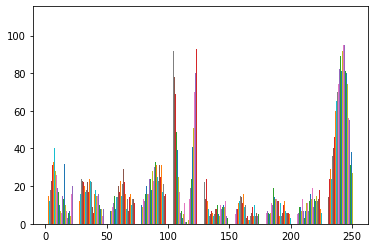

In [112]:
plt.hist(res2[0])
plt.show()

In [72]:

j=[]
f = cv2.imread('C:\\Users\khali\\101_ObjectCategories\\accordion\\image_0001.jpg')
f = cv2.resize(image, (200, 200))
Z = image.reshape((-1,3))

Z = np.float32(Z)

s = cv2.LUT(Z, lut,j)


TypeError: Expected Ptr<cv::UMat> for argument 'dst'

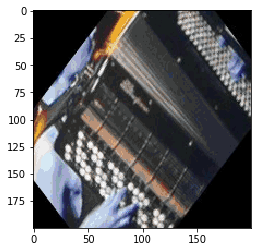

In [137]:
im = lut[res2[13]]
im = im.reshape(200,200,3)
plt.subplot(1, 1, 1)
plt.imshow(im)

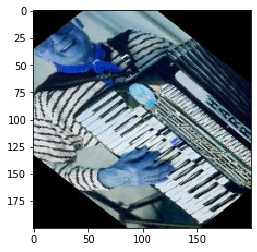

In [243]:
s = all_images[20].reshape(200,200,3)
s= np.uint8(s)
plt.subplot(1, 1, 1)
plt.imshow(s)

In [133]:
all_images[10].shape

(40000, 3)

In [139]:
lut_i = []
for i in range(256):
    lut_i.append(i)

In [141]:
X = lut
y = lut_i
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y) 

print(neigh.predict([[100, 100, 100]]))

[28]


In [154]:
res2[13][20][127]

98

In [155]:
s[20][127]

array([24, 29, 32], dtype=uint8)

In [180]:
print(neigh.predict([[24, 29, 32]]))

[73]


In [145]:
lut[78]

array([5, 5, 6], dtype=uint8)

In [208]:
def RGB_to_Indexed(queryimage):
    new = []
    for pixel in queryimage:
        distances = []
        for i in lut:
            d = np.linalg.norm(pixel - i)
            distances.append(d)
        a = np.array(distances)
        idx = np.argmin(a)
        new.append(idx)
    return new

In [229]:
queryimage = cv2.imread('C:\\Users\khali\\101_ObjectCategories\\accordion\\image_0021.jpg')
queryimage = cv2.resize(queryimage, (200, 200))
queryimage = queryimage.reshape((-1,3))



In [230]:
s = RGB_to_Indexed(queryimage)
s = np.array(s)

In [231]:
s.shape

(40000,)

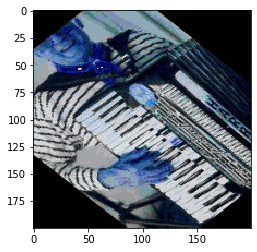

In [232]:
im = lut[s]
im = im.reshape(200,200,3)
plt.subplot(1, 1, 1)
plt.imshow(im)

In [223]:
s.shape

(40000,)